In [1]:
import pandas as pd
import numpy  as np

import pickle
 
from pathlib import Path

import matplotlib.pyplot as plt


import sys
sys.path.append("D:/analyze_Pearson_residuals")

from  plot_tab_utilities import *


pd.set_option('display.max_columns', 5)

In [2]:
#### user specified
data_folder = r"D:/analyze_Pearson_residuals/"

data_subfolder = "10k_brain"

data_path = Path ( data_folder + data_subfolder )

In [3]:
# output plots
Lg_plot_jpg = data_subfolder + "_Figure_3.jpg"
Sg_plot_jpg = data_subfolder + "_Figure_5.jpg"

# input data
nru_dict_pkl =  "nru_dict.pkl"
scanpy_variance_pkl = "residual_variance_scanpy.pkl"
SCT_variance_pkl = "SCT_v2_residual_variance.pkl"


# paths: output plots
Lg_plot_dsn = data_path / Lg_plot_jpg
Sg_plot_dsn = data_path / Sg_plot_jpg

# paths: input data
nru_dict_dsn = data_path / nru_dict_pkl
scanpy_variance_dsn = data_path / scanpy_variance_pkl
SCT_variance_dsn = data_path / SCT_variance_pkl

In [4]:
pctl_list = [.01,.05, .10, .25, .5, .75, .90, .95, .99 ]	

bins_500 = [ 0, 20, 50, 100, 200, 500, 1e6]
labels_500 = ['1-20', '21-50', '51-100', '101-200', '201-500', '501+']

In [5]:
f = open( nru_dict_dsn, 'rb' )    
nru_dict = pickle.load(f)           
f.close()       

df_gene_stats = nru_dict['df_gene_stats'] [[ 'nz_cells', 'M_g', 'A_g']]
df_gene_stats = df_gene_stats.assign(rank_A_g = df_gene_stats['A_g'].rank ( ascending=False ).values)

print ( '\n\n df_gene_stats'  )
print ( df_gene_stats  )
print ( '\n\n df_gene_stats.describe' )
print ( df_gene_stats.describe ( percentiles=pctl_list ) )



 df_gene_stats
                    nz_cells          M_g          A_g  rank_A_g
ENSMUSG00000052305      4111  4124.336945  4003.436265       1.0
ENSMUSG00000073940      1357  1305.624180  1188.055973       2.0
ENSMUSG00000069919       959   771.789797   749.206331       3.0
ENSMUSG00000069917       916   542.570514   526.798715       4.0
ENSMUSG00000019874      6156   154.696097   143.286862       5.0
...                      ...          ...          ...       ...
ENSMUSG00000027075       118     1.112878     0.646999   13785.5
ENSMUSG00000026389        52     1.134578     0.646999   13785.5
ENSMUSG00000063021        57     0.973301     0.646999   13785.5
ENSMUSG00000032204        59     0.894099     0.646999   13785.5
ENSMUSG00000043629       107     0.950153     0.646999   13785.5

[13817 rows x 4 columns]


 df_gene_stats.describe
           nz_cells           M_g           A_g      rank_A_g
count  13817.000000  13817.000000  13817.000000  13817.000000
mean    2275.815300      2.

In [6]:
df_Lg = pd.read_pickle ( scanpy_variance_dsn ).rename( columns={'CLIPPED':'L_g'} )
df_Lg = df_Lg.assign( rank_L_g = df_Lg['L_g'].rank ( ascending=False ).values,
                      clipping_effect = ( ~ ( df_Lg['L_g'] == df_Lg['UNCLIPPED'] ) ).astype(int) )

print ( '\n\n df_Lg'  )
print ( df_Lg  )
print ( '\n\n df_Lg.describe' )
print ( df_Lg.describe ( percentiles=pctl_list ) )

print (  '\n\n df_Lg[clipping_effect].sum() \n\n', df_Lg['clipping_effect'].sum()  )



 df_Lg
                           L_g    UNCLIPPED  rank_L_g  clipping_effect
ENSMUSG00000052305  343.479659  2286.218409       1.0                1
ENSMUSG00000073940  192.945229   983.121451       4.0                1
ENSMUSG00000069919  261.035675   653.893380       2.0                1
ENSMUSG00000069917  243.073028   481.069479       3.0                1
ENSMUSG00000019874  124.047541   131.850845       5.0                1
...                        ...          ...       ...              ...
ENSMUSG00000027075    1.112728     1.112728    8175.0                0
ENSMUSG00000026389    1.134343     1.134343    7615.0                0
ENSMUSG00000063021    0.973234     0.973234   11887.0                0
ENSMUSG00000032204    0.894035     0.894035   13433.0                0
ENSMUSG00000043629    0.949970     0.949970   12470.0                0

[13817 rows x 4 columns]


 df_Lg.describe
                L_g     UNCLIPPED     rank_L_g  clipping_effect
count  13817.000000  13817.0000

In [7]:
df_Sg = pd.read_pickle ( SCT_variance_dsn ).rename( columns={'residual_variance':'S_g'} )
df_Sg = df_Sg.assign(rank_S_g = df_Sg['S_g'].rank ( ascending=False ).values )

print ( '\n\n df_Sg'  )
print ( df_Sg  )
print ( '\n\n df_Sg.describe' )
print ( df_Sg.describe ( percentiles=pctl_list ) )



 df_Sg
                           S_g  rank_S_g
ENSMUSG00000052305  340.856589       1.0
ENSMUSG00000073940  289.955827       5.0
ENSMUSG00000069919  328.202041       2.0
ENSMUSG00000069917  321.635378       3.0
ENSMUSG00000019874  310.153152       4.0
...                        ...       ...
ENSMUSG00000027075    0.260136   12783.0
ENSMUSG00000026389    0.201280   13116.0
ENSMUSG00000063021    0.130570   13632.0
ENSMUSG00000032204    0.123363   13692.0
ENSMUSG00000043629    0.270136   12728.0

[13817 rows x 2 columns]


 df_Sg.describe
                S_g     rank_S_g
count  13817.000000  13817.00000
mean       1.281381   6909.00000
std        6.657345   3988.76867
min        0.104647      1.00000
1%         0.125015    139.16000
5%         0.199700    691.80000
10%        0.327976   1382.60000
25%        0.704672   3455.00000
50%        0.864410   6909.00000
75%        1.049489  10363.00000
90%        1.412551  12435.40000
95%        2.122311  13126.20000
99%        8.416621  13678

In [8]:
df_compare_Lg = pd.concat ( [ df_gene_stats, df_Lg], axis=1, sort=False )
df_compare_Lg = df_compare_Lg.assign ( _rank_A_g_ = pd.cut ( df_compare_Lg['rank_A_g'], bins_500, labels=labels_500 ), 
                                       _rank_L_g_ = pd.cut ( df_compare_Lg['rank_L_g'], bins_500, labels=labels_500 ) )
pd.set_option('display.max_columns', 9)
print ( '\n\n df_compare_Lg'  )
print ( df_compare_Lg  )
print ( '\n\n df_compare_Lg.describe' )
print ( df_compare_Lg.describe ( percentiles=pctl_list ) )

pti_Lg = pv_table_noprint_margins ( df_compare_Lg, '_rank_A_g_', '_rank_L_g_' )
print ( '\n\n Table 4 \n relation between ranks of Ag and Lg\n' )
print ( pti_Lg )



 df_compare_Lg
                    nz_cells          M_g          A_g  rank_A_g  ...  \
ENSMUSG00000052305      4111  4124.336945  4003.436265       1.0  ...   
ENSMUSG00000073940      1357  1305.624180  1188.055973       2.0  ...   
ENSMUSG00000069919       959   771.789797   749.206331       3.0  ...   
ENSMUSG00000069917       916   542.570514   526.798715       4.0  ...   
ENSMUSG00000019874      6156   154.696097   143.286862       5.0  ...   
...                      ...          ...          ...       ...  ...   
ENSMUSG00000027075       118     1.112878     0.646999   13785.5  ...   
ENSMUSG00000026389        52     1.134578     0.646999   13785.5  ...   
ENSMUSG00000063021        57     0.973301     0.646999   13785.5  ...   
ENSMUSG00000032204        59     0.894099     0.646999   13785.5  ...   
ENSMUSG00000043629       107     0.950153     0.646999   13785.5  ...   

                    rank_L_g  clipping_effect  _rank_A_g_  _rank_L_g_  
ENSMUSG00000052305       1.0      

In [9]:
df_compare_Sg = pd.concat ( [ df_gene_stats, df_Sg], axis=1, sort=False )
df_compare_Sg = df_compare_Sg.assign ( _rank_A_g_ = pd.cut ( df_compare_Sg['rank_A_g'], bins_500, labels=labels_500 ), 
                                       _rank_S_g_ = pd.cut ( df_compare_Sg['rank_S_g'], bins_500, labels=labels_500 ) )
print ( '\n\n df_compare_Sg'  )
print ( df_compare_Sg  )
print ( '\n\n df_compare_Sg.describe' )
print ( df_compare_Sg.describe ( percentiles=pctl_list ) )

pti_Sg = pv_table_noprint_margins ( df_compare_Sg, '_rank_A_g_', '_rank_S_g_' )
print ( '\n\n Table 6 \n relation between ranks of Ag and Sg\n' )
print ( pti_Sg )



 df_compare_Sg
                    nz_cells          M_g          A_g  rank_A_g         S_g  \
ENSMUSG00000052305      4111  4124.336945  4003.436265       1.0  340.856589   
ENSMUSG00000073940      1357  1305.624180  1188.055973       2.0  289.955827   
ENSMUSG00000069919       959   771.789797   749.206331       3.0  328.202041   
ENSMUSG00000069917       916   542.570514   526.798715       4.0  321.635378   
ENSMUSG00000019874      6156   154.696097   143.286862       5.0  310.153152   
...                      ...          ...          ...       ...         ...   
ENSMUSG00000027075       118     1.112878     0.646999   13785.5    0.260136   
ENSMUSG00000026389        52     1.134578     0.646999   13785.5    0.201280   
ENSMUSG00000063021        57     0.973301     0.646999   13785.5    0.130570   
ENSMUSG00000032204        59     0.894099     0.646999   13785.5    0.123363   
ENSMUSG00000043629       107     0.950153     0.646999   13785.5    0.270136   

                    ra

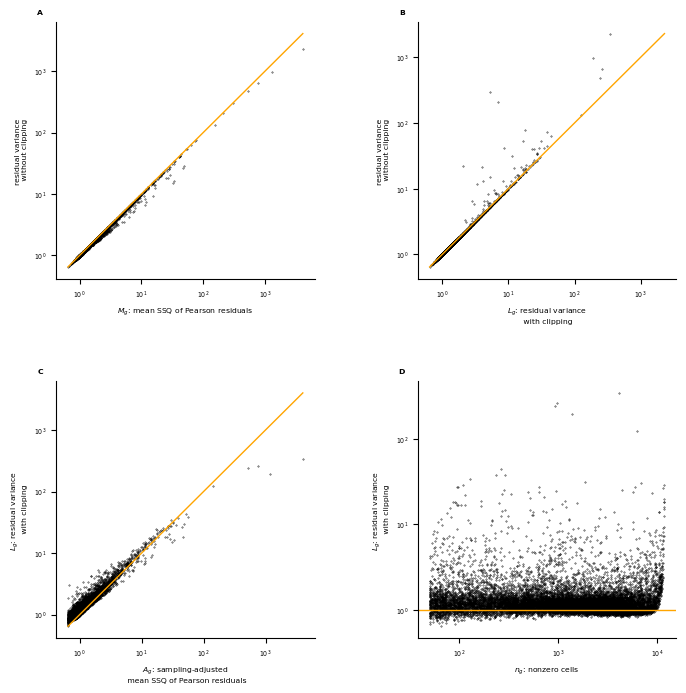

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=( 8, 8) )

plot_ax ( df_compare_Lg, ax1, 'A', 'M_g', 'UNCLIPPED','$M_g$: mean SSQ of Pearson residuals',  'residual variance \n without clipping' )
plot_ax ( df_compare_Lg, ax2, 'B', 'L_g', 'UNCLIPPED','$L_g$: residual variance \n with clipping',  'residual variance \n without clipping' )
plot_ax ( df_compare_Lg, ax3, 'C', 'A_g', 'L_g', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals',  '$L_g$: residual variance \n with clipping' )
plot_ax ( df_compare_Lg, ax4, 'D', 'nz_cells', 'L_g', '$n_g$: nonzero cells',  '$L_g$: residual variance \n with clipping', line_slope='horizontal' )

plt.subplots_adjust( wspace=0.4, hspace=0.4)

plt.savefig( Lg_plot_dsn, transparent=True, dpi=300 ) 

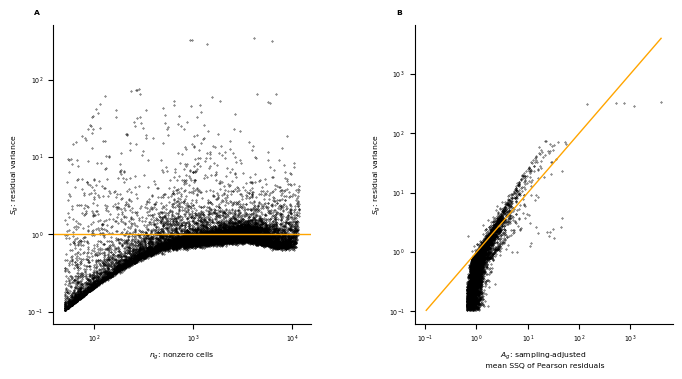

In [11]:
fig, (ax1, ax2)  = plt.subplots(1,2, figsize=( 8., 4.4 ) )

plot_ax ( df_compare_Sg, ax1, 'A',  'nz_cells', 'S_g', '$n_g$: nonzero cells',   '$S_g$: residual variance', line_slope='horizontal'  )
plot_ax ( df_compare_Sg, ax2, 'B', 'A_g', 'S_g', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals',  '$S_g$: residual variance'  )

plt.subplots_adjust( bottom=0.2, wspace=0.4 )

plt.savefig( Sg_plot_dsn, transparent=True, dpi=300 ) 